# Plots for interpolated transport between SSH contours

Landscape and portrait versions per hotspot, for eddy kinetic energy, interfacial form stress conversion and Reynolds stress conversion

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cftime
import glob
import dask
import os
import datetime
import matplotlib.colors as col
import dask.array as dsa
from cosima_cookbook import distributed as ccd
import cartopy.crs as ccrs
import cmocean as cm
from scipy.ndimage.filters import uniform_filter1d


from collections import OrderedDict

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:37833 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 16 Memory: 64.00 GiB


In [3]:
from matplotlib import gridspec
import matplotlib as mpl

In [4]:
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 12})

In [7]:
EKE = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/EKE_10yr.nc').EKE
MKE = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MKE_10yr.nc').MKE
Reynolds = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/Reynolds_10yr_fulldepth.nc').Reynolds
Form_stress = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/Form_stress_10yr_fulldepth.nc').Form_stress


In [8]:
n=35
x = 0.5
lower = plt.cm.RdBu_r(np.linspace(0, x, n))
white = plt.cm.RdBu_r(np.ones(80-2*n)*x)
upper = plt.cm.RdBu_r(np.linspace(1-x, 1, n))
colors = np.vstack((lower, white, upper))
tmap = mpl.colors.LinearSegmentedColormap.from_list('map_white', colors)


(-57.0, -48.0)

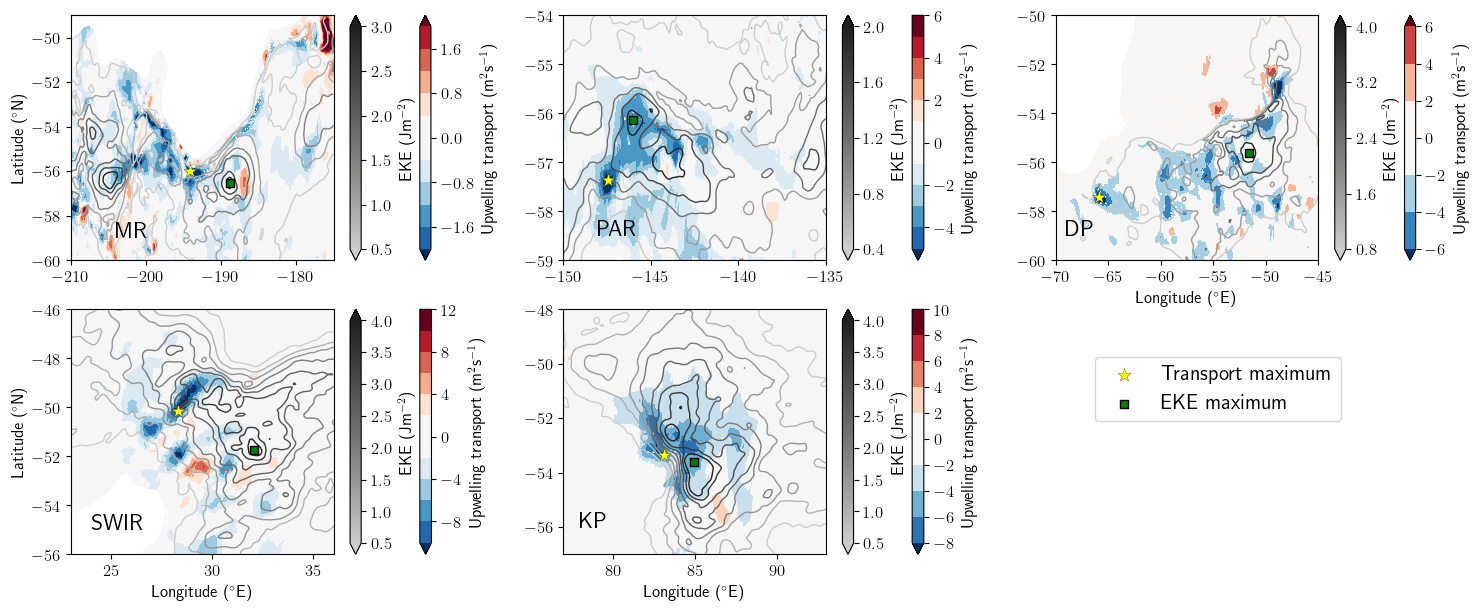

In [9]:
newcmap = cm.tools.crop_by_percent(cm.cm.gray_r, 30, which='both', N= None)
fig = plt.figure(num=1,figsize=(18,7))
gs = gridspec.GridSpec(2,3) 
ax0, ax1, ax2, ax3, ax4 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[0,2]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1])
gs.update(hspace = 0.2, wspace=0.2)

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp
p0 = (transport_new).plot.contourf(ax= ax0,x = 'x_ocean', levels = np.arange(-2.0,2.1,0.4), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax0, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-205,-175)).plot.contourf(ax = ax0,cmap = 'RdBu_r', levels = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.2962295,1032.51)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-210,-175)).plot.contour(ax = ax0, add_colorbar = False, levels = [0.5,1,1.5,2,2.5,3], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax0, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax0, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.5,1,1.5,2,2.5,3])

ax0.text(-204,-59,'MR', fontsize = 16);
x = transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).min('y_ocean').argmin('x_ocean')
y = transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).min('x_ocean').argmin('y_ocean')
ax0.scatter(transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).x_ocean[x],
            transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).y_ocean[y], 
            color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth =0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).max('xt_ocean').argmax('yt_ocean')
ax0.scatter(EKE_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/PAR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                  
p0 = (transport_new).plot.contourf(ax= ax1,x = 'x_ocean', levels = np.arange(-5,7,1), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax1, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contourf(ax = ax1,cmap = 'RdBu_r', levels = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.22305317,1032.5)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contour(ax = ax1, add_colorbar = False,levels = [0.4,0.8,1.2,1.6,2], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax1, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.4, vmax=2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax1, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.4,0.8,1.2,1.6,2])

ax1.text(-148,-58.5,'PAR', fontsize = 16);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax1.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).max('xt_ocean').argmax('yt_ocean')
ax1.scatter(EKE_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################


transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/DP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax2,x = 'x_ocean', levels = np.arange(-6,7,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax2, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel( yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.13010113,1032.48)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2, add_colorbar = False,levels = [0.8,1.6,2.4,3.2,4], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax2, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.8, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax2, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.8,1.6,2.4,3.2,4])

ax2.text(-69,-59,'DP', fontsize = 16);
x = transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).min('y_ocean').argmin('x_ocean')
y = transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).min('x_ocean').argmin('y_ocean')
ax2.scatter(transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).x_ocean[x],
            transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).y_ocean[y], 
            color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-50)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-50)).max('xt_ocean').argmax('yt_ocean')
ax2.scatter(EKE_upwelling.sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-50)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-50)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SWIR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax3,x = 'x_ocean', levels = np.arange(-10,13,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax3, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel( yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3,cmap = 'viridis_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.13490907,1032.48)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3, add_colorbar = False,levels = [0.5,1,1.5,2,2.5,3,3.5,4], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax3, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax3, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.5,1,1.5,2,2.5,3,3.5,4])

ax3.text(24,-55,'SWIR', fontsize = 16);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax3.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).max('xt_ocean').argmax('yt_ocean')
ax3.scatter(EKE_upwelling.sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/KP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax4,x = 'x_ocean', levels = np.arange(-8,11,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax4, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', extend = 'both')
#FS_upwelling_KP = FS_upwelling.roll(xt_ocean = 800)
#FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
EKE_upwelling_KP = EKE.sel(isopycnal_bins=slice(1032.19249245,1032.48)).sum('isopycnal_bins').roll(xt_ocean =800)
EKE_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
#p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = cm.cm.delta_r, levels = [-0.15,-0.075,0.075,0.15], add_colorbar = False, linewidths = 1)
p2 = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4, add_colorbar = False,levels = [0.5,1,1.5,2,2.5,3,3.5,4], cmap = newcmap, linewidths = 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax4, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax4, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both', ticks = [0.5,1,1.5,2,2.5,3,3.5,4])

ax4.text(78,-56,'KP', fontsize = 16);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax4.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2, label = 'Transport maximum')
x = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).max('xt_ocean').argmax('yt_ocean')
ax4.scatter(EKE_upwelling_KP.sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).xt_ocean[x],
            EKE_upwelling_KP.sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2, label = 'EKE maximum')
ax4.legend(bbox_to_anchor=(3,0.5),loc = 'lower right', fontsize = 15)
#############################################################################################

ax0.set_ylabel('Latitude ($^\circ$N)')
ax0.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlabel('Longitude ($^\circ$E)')
ax3.set_ylabel('Latitude ($^\circ$N)')
ax3.set_xlabel('Longitude ($^\circ$E)')
ax4.set_ylabel('')
ax4.set_xlabel('Longitude ($^\circ$E)')

ax0.set_ylim(-60,-49)
ax0.set_xlim(-210,-175)
ax1.set_xlim(-150,-135)
ax1.set_ylim(-59,-54)
ax2.set_xlim(-70,-45)
ax2.set_ylim(-60,-50)
ax3.set_xlim(23,36)
ax3.set_ylim(-56,-46)
ax4.set_xlim(77,93)
ax4.set_ylim(-57,-48)

#fig.savefig('EKEinterp_landscape.png', dpi = 400)

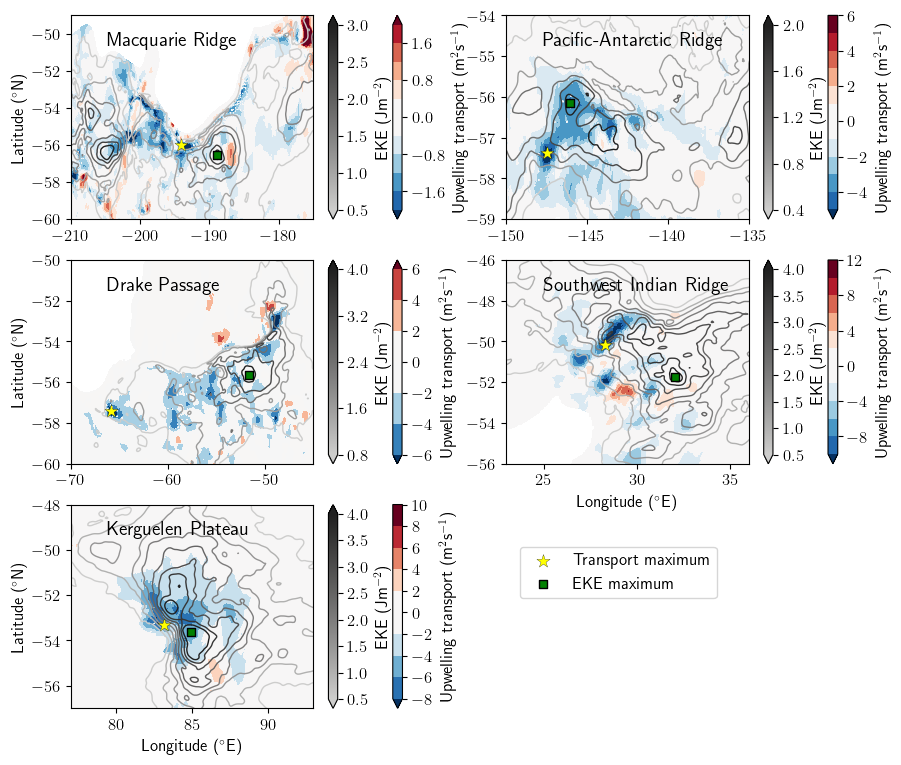

In [10]:
newcmap = cm.tools.crop_by_percent(cm.cm.gray_r, 30, which='both', N= None)
fig = plt.figure(num=1,figsize=(10.5,9))
gs = gridspec.GridSpec(3,2) 
ax0, ax1, ax2, ax3, ax4 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1]), plt.subplot(gs[2,0])
gs.update(hspace = 0.2, wspace=0.15)

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp
p0 = (transport_new).plot.contourf(ax= ax0,x = 'x_ocean', levels = np.arange(-2.0,2.1,0.4), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax0, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-205,-175)).plot.contourf(ax = ax0,cmap = 'RdBu_r', levels = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.2962295,1032.51)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-210,-175)).plot.contour(ax = ax0, add_colorbar = False, levels = [0.5,1,1.5,2,2.5,3], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax0, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax0, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.5,1,1.5,2,2.5,3])

ax0.text(0.15,0.85,'Macquarie Ridge', fontsize = 14, transform=ax0.transAxes);
x = transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).min('y_ocean').argmin('x_ocean')
y = transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).min('x_ocean').argmin('y_ocean')
ax0.scatter(transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).x_ocean[x],
            transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).y_ocean[y], 
            color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth =0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).max('xt_ocean').argmax('yt_ocean')
ax0.scatter(EKE_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/PAR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                  
p0 = (transport_new).plot.contourf(ax= ax1,x = 'x_ocean', levels = np.arange(-5,7,1), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax1, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contourf(ax = ax1,cmap = 'RdBu_r', levels = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.22305317,1032.5)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contour(ax = ax1, add_colorbar = False,levels = [0.4,0.8,1.2,1.6,2], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax1, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.4, vmax=2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax1, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.4,0.8,1.2,1.6,2])

ax1.text(0.15,0.85,'Pacific-Antarctic Ridge', fontsize = 14, transform=ax1.transAxes);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax1.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).max('xt_ocean').argmax('yt_ocean')
ax1.scatter(EKE_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################


transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/DP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax2,x = 'x_ocean', levels = np.arange(-6,7,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax2, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel( yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.13010113,1032.48)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2, add_colorbar = False,levels = [0.8,1.6,2.4,3.2,4], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax2, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.8, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax2, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.8,1.6,2.4,3.2,4])

ax2.text(0.15,0.85,'Drake Passage', fontsize = 14, transform=ax2.transAxes);
x = transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).min('y_ocean').argmin('x_ocean')
y = transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).min('x_ocean').argmin('y_ocean')
ax2.scatter(transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).x_ocean[x],
            transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).y_ocean[y], 
            color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-50)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-50)).max('xt_ocean').argmax('yt_ocean')
ax2.scatter(EKE_upwelling.sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-50)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-50)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SWIR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax3,x = 'x_ocean', levels = np.arange(-10,13,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax3, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel( yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3,cmap = 'viridis_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.13490907,1032.48)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3, add_colorbar = False,levels = [0.5,1,1.5,2,2.5,3,3.5,4], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax3, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax3, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.5,1,1.5,2,2.5,3,3.5,4])

ax3.text(0.15,0.85,'Southwest Indian Ridge', fontsize = 14, transform=ax3.transAxes);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax3.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).max('xt_ocean').argmax('yt_ocean')
ax3.scatter(EKE_upwelling.sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/KP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax4,x = 'x_ocean', levels = np.arange(-8,11,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax4, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', extend = 'both')
#FS_upwelling_KP = FS_upwelling.roll(xt_ocean = 800)
#FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
EKE_upwelling_KP = EKE.sel(isopycnal_bins=slice(1032.19249245,1032.48)).sum('isopycnal_bins').roll(xt_ocean =800)
EKE_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
#p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = cm.cm.delta_r, levels = [-0.15,-0.075,0.075,0.15], add_colorbar = False, linewidths = 1)
p2 = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4, add_colorbar = False,levels = [0.5,1,1.5,2,2.5,3,3.5,4], cmap = newcmap, linewidths = 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax4, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax4, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both', ticks = [0.5,1,1.5,2,2.5,3,3.5,4])

ax4.text(0.15,0.85,'Kerguelen Plateau', fontsize = 14, transform=ax4.transAxes);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax4.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=100, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2, label = 'Transport maximum')
x = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).max('xt_ocean').argmax('yt_ocean')
ax4.scatter(EKE_upwelling_KP.sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).xt_ocean[x],
            EKE_upwelling_KP.sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2, label = 'EKE maximum')
ax4.legend(bbox_to_anchor=(2.7,0.5),loc = 'lower right')
#############################################################################################

ax0.set_ylabel('Latitude ($^\circ$N)')
ax0.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('Latitude ($^\circ$N)')
ax2.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xlabel('Longitude ($^\circ$E)')
ax4.set_ylabel('Latitude ($^\circ$N)')
ax4.set_xlabel('Longitude ($^\circ$E)')

ax0.set_ylim(-60,-49)
ax0.set_xlim(-210,-175)
ax1.set_xlim(-150,-135)
ax1.set_ylim(-59,-54)
ax2.set_xlim(-70,-45)
ax2.set_ylim(-60,-50)
ax3.set_xlim(23,36)
ax3.set_ylim(-56,-46)
ax4.set_xlim(77,93)
ax4.set_ylim(-57,-48)

#fig.savefig('EKEinterp.png', dpi = 400)

(-57.0, -48.0)

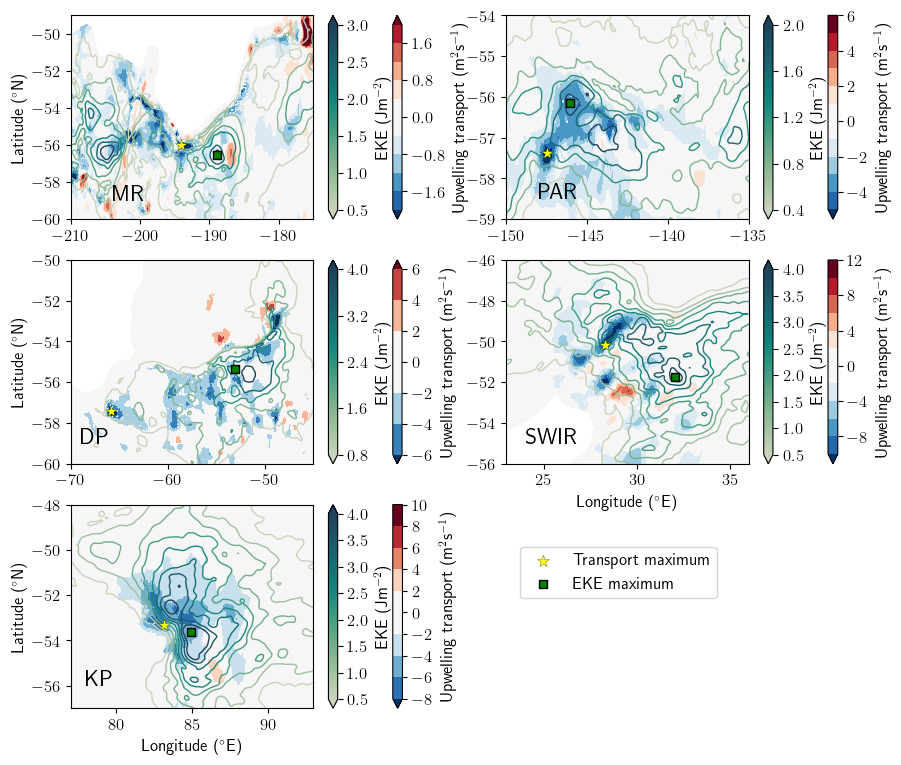

In [11]:
newcmap = cm.tools.crop_by_percent(cm.cm.tempo, 30, which='both', N= None)
fig = plt.figure(num=1,figsize=(10.5,9))
gs = gridspec.GridSpec(3,2) 
ax0, ax1, ax2, ax3, ax4 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1]), plt.subplot(gs[2,0])
gs.update(hspace = 0.2, wspace=0.15)

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp
p0 = (transport_new).plot.contourf(ax= ax0,x = 'x_ocean', levels = np.arange(-2.0,2.1,0.4), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax0, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-205,-175)).plot.contourf(ax = ax0,cmap = 'RdBu_r', levels = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.2962295,1032.51)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-210,-175)).plot.contour(ax = ax0, add_colorbar = False, levels = [0.5,1,1.5,2,2.5,3], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax0, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax0, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.5,1,1.5,2,2.5,3])

ax0.text(-204,-59,'MR', fontsize = 16);
x = transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).min('y_ocean').argmin('x_ocean')
y = transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).min('x_ocean').argmin('y_ocean')
ax0.scatter(transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).x_ocean[x],
            transport_new.sel(y_ocean = slice(-63,-49),x_ocean = slice(-195,-175)).y_ocean[y], 
            color = 'yellow',s=80, marker = '*', edgecolors = 'k', zorder = 2, linewidth =0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).max('xt_ocean').argmax('yt_ocean')
ax0.scatter(EKE_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-195,-175)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/PAR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                  
p0 = (transport_new).plot.contourf(ax= ax1,x = 'x_ocean', levels = np.arange(-5,7,1), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax1, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contourf(ax = ax1,cmap = 'RdBu_r', levels = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.22305317,1032.5)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contour(ax = ax1, add_colorbar = False,levels = [0.4,0.8,1.2,1.6,2], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax1, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.4, vmax=2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax1, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.4,0.8,1.2,1.6,2])

ax1.text(-148,-58.5,'PAR', fontsize = 16);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax1.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=80, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).max('xt_ocean').argmax('yt_ocean')
ax1.scatter(EKE_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################


transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/DP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax2,x = 'x_ocean', levels = np.arange(-6,7,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax2, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel( yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.13010113,1032.48)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2, add_colorbar = False,levels = [0.8,1.6,2.4,3.2,4], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax2, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.8, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax2, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.8,1.6,2.4,3.2,4])

ax2.text(-69,-59,'DP', fontsize = 16);
x = transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).min('y_ocean').argmin('x_ocean')
y = transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).min('x_ocean').argmin('y_ocean')
ax2.scatter(transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).x_ocean[x],
            transport_new.sel(y_ocean = slice(-60,-50),x_ocean = slice(-70,-53)).y_ocean[y], 
            color = 'yellow',s=80, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-53)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-53)).max('xt_ocean').argmax('yt_ocean')
ax2.scatter(EKE_upwelling.sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-53)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-53)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SWIR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax3,x = 'x_ocean', levels = np.arange(-10,13,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax3, label = 'Upwelling transport (m$^{2}$s$^{-1}$)')
#p1 = FS_upwelling.sel( yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3,cmap = 'viridis_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.13490907,1032.48)).sum('isopycnal_bins')
p2 = (EKE_upwelling/1e4).sel(yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3, add_colorbar = False,levels = [0.5,1,1.5,2,2.5,3,3.5,4], cmap = newcmap, linewidths= 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax3, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax3, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both',
            ticks = [0.5,1,1.5,2,2.5,3,3.5,4])

ax3.text(24,-55,'SWIR', fontsize = 16);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax3.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=80, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2)
x = (EKE_upwelling/1e4).sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling/1e4).sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).max('xt_ocean').argmax('yt_ocean')
ax3.scatter(EKE_upwelling.sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).xt_ocean[x],
            EKE_upwelling.sel(yt_ocean = slice(-56,-46),xt_ocean = slice(20,40)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2)
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/KP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax4,x = 'x_ocean', levels = np.arange(-8,11,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax4, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', extend = 'both')
#FS_upwelling_KP = FS_upwelling.roll(xt_ocean = 800)
#FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
EKE_upwelling_KP = EKE.sel(isopycnal_bins=slice(1032.19249245,1032.48)).sum('isopycnal_bins').roll(xt_ocean =800)
EKE_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
#p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = cm.cm.delta_r, levels = [-0.15,-0.075,0.075,0.15], add_colorbar = False, linewidths = 1)
p2 = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4, add_colorbar = False,levels = [0.5,1,1.5,2,2.5,3,3.5,4], cmap = newcmap, linewidths = 1)#, linestyles = '--')
# cb = plt.colorbar(p2,ax=ax4, orientation='vertical')
# cb.ax.set_ylabel('EKE (Jm$^{-2}$)');
cmap = newcmap
norm =  mpl.colors.Normalize(vmin=0.5, vmax=4)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax4, orientation='vertical', label='EKE (Jm$^{-2}$)', spacing='proportional', extend = 'both', ticks = [0.5,1,1.5,2,2.5,3,3.5,4])

ax4.text(78,-56,'KP', fontsize = 16);
x = transport_new.min('y_ocean').argmin('x_ocean')
y = transport_new.min('x_ocean').argmin('y_ocean')
ax4.scatter(transport_new.x_ocean[x],transport_new.y_ocean[y], color = 'yellow',s=80, marker = '*', edgecolors = 'k', zorder = 2, linewidth = 0.2, label = 'Transport maximum')
x = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).max('yt_ocean').argmax('xt_ocean')
y = (EKE_upwelling_KP/1e4).sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).max('xt_ocean').argmax('yt_ocean')
ax4.scatter(EKE_upwelling_KP.sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).xt_ocean[x],
            EKE_upwelling_KP.sel( yt_ocean = slice(-57,-48),xt_ocean = slice(77,93)).yt_ocean[y], color = 'green',s=40, marker = 's', edgecolors = 'k', zorder = 2, label = 'EKE maximum')
ax4.legend(bbox_to_anchor=(2.7,0.5),loc = 'lower right')
#############################################################################################

ax0.set_ylabel('Latitude ($^\circ$N)')
ax0.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('Latitude ($^\circ$N)')
ax2.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xlabel('Longitude ($^\circ$E)')
ax4.set_ylabel('Latitude ($^\circ$N)')
ax4.set_xlabel('Longitude ($^\circ$E)')

ax0.set_ylim(-60,-49)
ax0.set_xlim(-210,-175)
ax1.set_xlim(-150,-135)
ax1.set_ylim(-59,-54)
ax2.set_xlim(-70,-45)
ax2.set_ylim(-60,-50)
ax3.set_xlim(23,36)
ax3.set_ylim(-56,-46)
ax4.set_xlim(77,93)
ax4.set_ylim(-57,-48)

#fig.savefig('EKEinterp.png', dpi = 400)

# Form stress

(-57.0, -48.0)

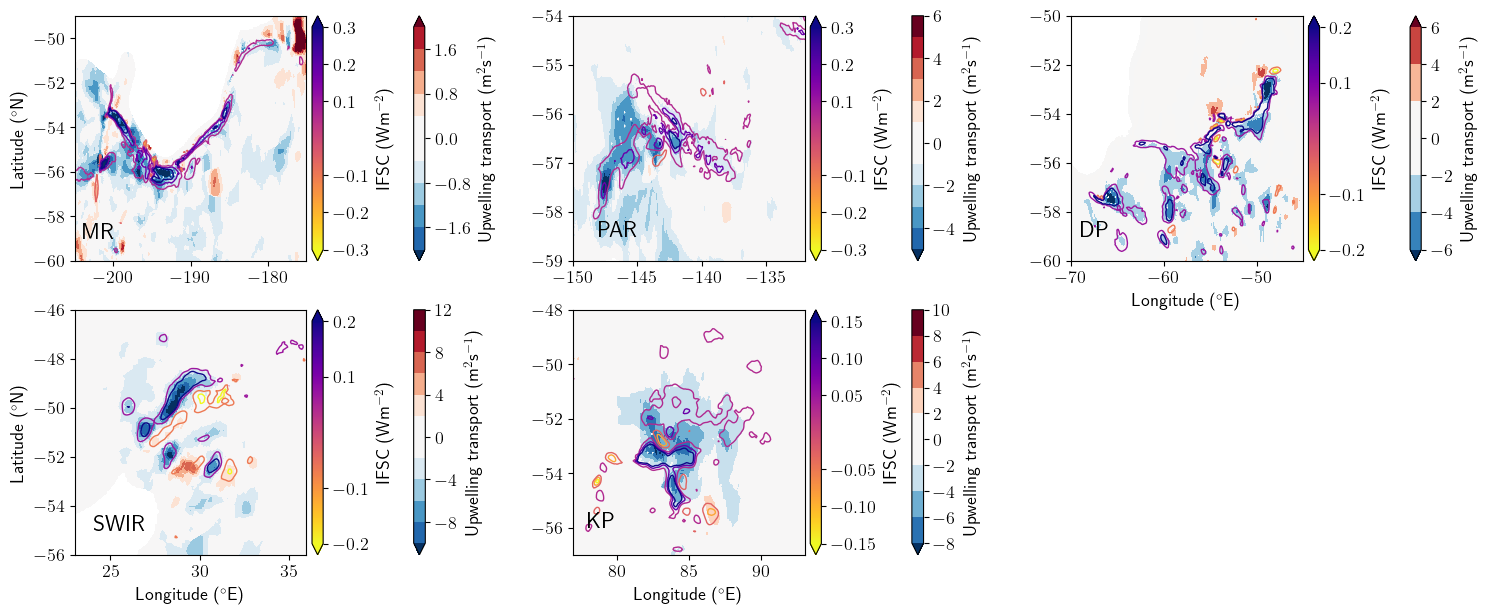

In [19]:
newcmap = cm.tools.crop_by_percent(cm.cm.tempo, 30, which='both', N= None)
fig = plt.figure(num=1,figsize=(18,7))
gs = gridspec.GridSpec(2,3) 
ax0, ax1, ax2, ax3, ax4 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[0,2]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1])
gs.update(hspace = 0.2, wspace=0.25)

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp
p0 = (transport_new).plot.contourf(ax= ax0,x = 'x_ocean', levels = np.arange(-2.0,2.1,0.4), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax0, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.2962295,1032.51)).sum('isopycnal_bins')
p1 = FS_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-205,-175)).plot.contour(ax = ax0,cmap = 'plasma_r', levels = [-0.3,-0.2,-0.1,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
#cb = plt.colorbar(p1,ax=ax0, orientation='vertical', pad = 0.02, spacing = 'proportional', extend='both')
#cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.3, vmax=0.3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax0, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.3,-0.2,-0.1,0.1,0.2,0.3])

ax0.text(-204,-59,'MR', fontsize = 16);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/PAR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                  
p0 = (transport_new).plot.contourf(ax= ax1,x = 'x_ocean', levels = np.arange(-5,7,1), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax1, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.22305317,1032.5)).sum('isopycnal_bins')
p1 = FS_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contour(ax = ax1,cmap = 'plasma_r', levels = [-0.3,-0.2,-0.1,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax1, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.3, vmax=0.3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax1, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.3,-0.2,-0.1,0.1,0.2,0.3])

ax1.text(-148,-58.5,'PAR', fontsize = 16);
#############################################################################################


transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/DP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax2,x = 'x_ocean', levels = np.arange(-6,7,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax2, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.13010113,1032.48)).sum('isopycnal_bins')
p1 = FS_upwelling.sel( yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax2, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.2, vmax=0.2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax2, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.2,-0.1,0.1,0.2])

ax2.text(-69,-59,'DP', fontsize = 16);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SWIR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax3,x = 'x_ocean', levels = np.arange(-10,13,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax3, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.13490907,1032.48)).sum('isopycnal_bins')
p1 = FS_upwelling.sel( yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax3, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.2, vmax=0.2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax3, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.2,-0.1,0.1,0.2])

ax3.text(24,-55,'SWIR', fontsize = 16);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/KP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax4,x = 'x_ocean', levels = np.arange(-8,11,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax4, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', extend = 'both', pad = 0.15)
#FS_upwelling_KP = FS_upwelling.roll(xt_ocean = 800)
#FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
FS_upwelling_KP = Form_stress.sel(isopycnal_bins=slice(1032.19249245,1032.48)).sum('isopycnal_bins').roll(xt_ocean = 800)
FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = 'plasma_r', levels = [-0.15,-0.1,-0.05,0.05,0.1,0.15], add_colorbar = False, linewidths = 1)
#p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = 'plasma_r', levels = [-0.15,-0.1,-0.05,0.05,0.1,0.15], add_colorbar = False, linewidths = 1)

# cb = plt.colorbar(p1,ax=ax4, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.15, vmax=0.15)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax4, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.15,-0.1,-0.05,0.05,0.1,0.15])

ax4.text(78,-56,'KP', fontsize = 16);
#############################################################################################

ax0.set_ylabel('Latitude ($^\circ$N)')
ax0.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlabel('Longitude ($^\circ$E)')
ax3.set_ylabel('Latitude ($^\circ$N)')
ax3.set_xlabel('Longitude ($^\circ$E)')
ax4.set_ylabel('')
ax4.set_xlabel('Longitude ($^\circ$E)')

ax0.set_ylim(-60,-49)
ax0.set_xlim(-205,-175)
ax1.set_xlim(-150,-132)
ax1.set_ylim(-59,-54)
ax2.set_xlim(-70,-45)
ax2.set_ylim(-60,-50)
ax3.set_xlim(23,36)
ax3.set_ylim(-56,-46)
ax4.set_xlim(77,93)
ax4.set_ylim(-57,-48)

#fig.savefig('FSinterp.png', dpi = 400)

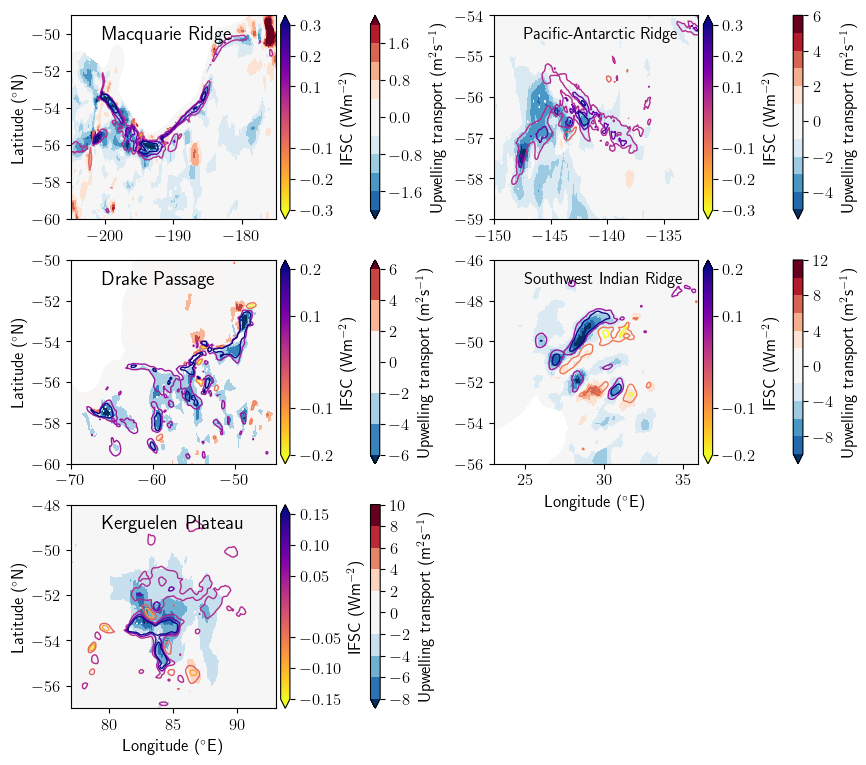

In [25]:
newcmap = cm.tools.crop_by_percent(cm.cm.tempo, 30, which='both', N= None)
fig = plt.figure(num=1,figsize=(10,9))
gs = gridspec.GridSpec(3,2) 
ax0, ax1, ax2, ax3, ax4 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1]), plt.subplot(gs[2,0])
gs.update(hspace = 0.2, wspace=0.2)

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp
p0 = (transport_new).plot.contourf(ax= ax0,x = 'x_ocean', levels = np.arange(-2.0,2.1,0.4), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax0, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.2962295,1032.51)).sum('isopycnal_bins')
p1 = FS_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-205,-175)).plot.contour(ax = ax0,cmap = 'plasma_r', levels = [-0.3,-0.2,-0.1,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
#cb = plt.colorbar(p1,ax=ax0, orientation='vertical', pad = 0.02, spacing = 'proportional', extend='both')
#cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.3, vmax=0.3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax0, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.3,-0.2,-0.1,0.1,0.2,0.3])

ax0.text(0.15,0.88,'Macquarie Ridge', fontsize = 14, transform=ax0.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/PAR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                  
p0 = (transport_new).plot.contourf(ax= ax1,x = 'x_ocean', levels = np.arange(-5,7,1), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax1, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.22305317,1032.5)).sum('isopycnal_bins')
p1 = FS_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contour(ax = ax1,cmap = 'plasma_r', levels = [-0.3,-0.2,-0.1,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax1, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.3, vmax=0.3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax1, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.3,-0.2,-0.1,0.1,0.2,0.3])

ax1.text(0.15,0.88,'Pacific-Antarctic Ridge', fontsize = 12, transform=ax1.transAxes);
#############################################################################################


transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/DP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax2,x = 'x_ocean', levels = np.arange(-6,7,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax2, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.13010113,1032.48)).sum('isopycnal_bins')
p1 = FS_upwelling.sel( yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax2, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.2, vmax=0.2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax2, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.2,-0.1,0.1,0.2])

ax2.text(0.15,0.88,'Drake Passage', fontsize = 14, transform=ax2.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SWIR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax3,x = 'x_ocean', levels = np.arange(-10,13,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax3, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.13490907,1032.48)).sum('isopycnal_bins')
p1 = FS_upwelling.sel( yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax3, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.2, vmax=0.2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax3, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.2,-0.1,0.1,0.2])

ax3.text(0.15,0.88,'Southwest Indian Ridge', fontsize = 12, transform=ax3.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/KP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax4,x = 'x_ocean', levels = np.arange(-8,11,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax4, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', extend = 'both', pad = 0.15)
#FS_upwelling_KP = FS_upwelling.roll(xt_ocean = 800)
#FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
FS_upwelling_KP = Form_stress.sel(isopycnal_bins=slice(1032.19249245,1032.48)).sum('isopycnal_bins').roll(xt_ocean = 800)
FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = 'plasma_r', levels = [-0.15,-0.1,-0.05,0.05,0.1,0.15], add_colorbar = False, linewidths = 1)
#p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = 'plasma_r', levels = [-0.15,-0.1,-0.05,0.05,0.1,0.15], add_colorbar = False, linewidths = 1)

# cb = plt.colorbar(p1,ax=ax4, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.15, vmax=0.15)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax4, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.15,-0.1,-0.05,0.05,0.1,0.15])

ax4.text(0.15,0.88,'Kerguelen Plateau', fontsize = 14, transform=ax4.transAxes);
#############################################################################################

ax0.set_ylabel('Latitude ($^\circ$N)')
ax0.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('Latitude ($^\circ$N)')
ax2.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xlabel('Longitude ($^\circ$E)')
ax4.set_ylabel('Latitude ($^\circ$N)')
ax4.set_xlabel('Longitude ($^\circ$E)')

ax0.set_ylim(-60,-49)
ax0.set_xlim(-205,-175)
ax1.set_xlim(-150,-132)
ax1.set_ylim(-59,-54)
ax2.set_xlim(-70,-45)
ax2.set_ylim(-60,-50)
ax3.set_xlim(23,36)
ax3.set_ylim(-56,-46)
ax4.set_xlim(77,93)
ax4.set_ylim(-57,-48)

#fig.savefig('FSinterp.png', dpi = 400)

# Reynolds

(-57.0, -48.0)

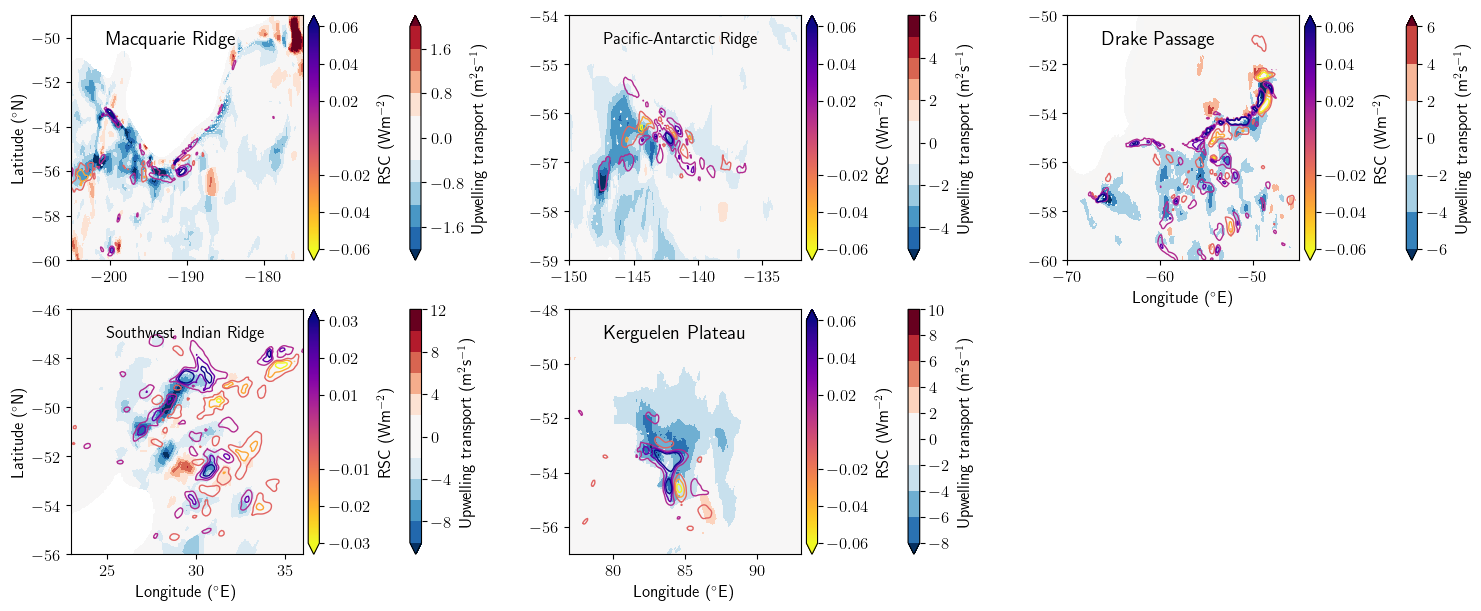

In [26]:
newcmap = cm.tools.crop_by_percent(cm.cm.tempo, 30, which='both', N= None)
fig = plt.figure(num=1,figsize=(18,7))
gs = gridspec.GridSpec(2,3) 
ax0, ax1, ax2, ax3, ax4 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[0,2]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1])
gs.update(hspace = 0.2, wspace=0.25)

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp
p0 = (transport_new).plot.contourf(ax= ax0,x = 'x_ocean', levels = np.arange(-2.0,2.1,0.4), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax0, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.2962295,1032.51)).sum('isopycnal_bins')
p1 = RS_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-205,-175)).plot.contour(ax = ax0,cmap = 'plasma_r', levels = [-0.06,-0.04,-0.02,0.02,0.04,0.06], add_colorbar = False, linewidths = 1)
#cb = plt.colorbar(p1,ax=ax0, orientation='vertical', pad = 0.02, spacing = 'proportional', extend='both')
#cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.06, vmax=0.06)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax0, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.06,-0.04,-0.02,0.02,0.04,0.06])

ax0.text(0.15,0.88,'Macquarie Ridge', fontsize = 14, transform=ax0.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/PAR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                  
p0 = (transport_new).plot.contourf(ax= ax1,x = 'x_ocean', levels = np.arange(-5,7,1), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax1, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.22305317,1032.5)).sum('isopycnal_bins')
p1 = RS_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contour(ax = ax1,cmap = 'plasma_r', levels = [-0.06,-0.04,-0.02,0.02,0.04,0.06], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax1, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.06, vmax=0.06)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax1, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.06,-0.04,-0.02,0.02,0.04,0.06])

ax1.text(0.15,0.88,'Pacific-Antarctic Ridge', fontsize = 12, transform=ax1.transAxes);
#############################################################################################


transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/DP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax2,x = 'x_ocean', levels = np.arange(-6,7,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax2, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.13010113,1032.48)).sum('isopycnal_bins')
p1 = RS_upwelling.sel( yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2,cmap = 'plasma_r', levels = [-0.06,-0.04,-0.02,0.02,0.04,0.06], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax2, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.06, vmax=0.06)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax2, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.06,-0.04,-0.02,0.02,0.04,0.06])

ax2.text(0.15,0.88,'Drake Passage', fontsize = 14, transform=ax2.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SWIR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax3,x = 'x_ocean', levels = np.arange(-10,13,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax3, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.13490907,1032.48)).sum('isopycnal_bins')
p1 = RS_upwelling.sel( yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3,cmap = 'plasma_r', levels = [-0.03,-0.02,-0.01,0.01,0.02,0.03], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax3, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.03, vmax=0.03)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax3, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.03,-0.02,-0.01,0.01,0.02,0.03])

ax3.text(0.15,0.88,'Southwest Indian Ridge', fontsize = 12, transform=ax3.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/KP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax4,x = 'x_ocean', levels = np.arange(-8,11,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax4, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', extend = 'both', pad = 0.15)
RS_upwelling_KP = Reynolds.sel(isopycnal_bins=slice(1032.19249245,1032.48)).sum('isopycnal_bins').roll(xt_ocean = 800)
RS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
p1 = RS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = 'plasma_r', levels = [-0.06,-0.04,-0.02,0.02,0.04,0.06], add_colorbar = False, linewidths = 1)

# cb = plt.colorbar(p1,ax=ax4, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.06, vmax=0.06)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax4, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.06,-0.04,-0.02,0.02,0.04,0.06])

ax4.text(0.15,0.88,'Kerguelen Plateau', fontsize = 14, transform=ax4.transAxes);
#############################################################################################

ax0.set_ylabel('Latitude ($^\circ$N)')
ax0.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlabel('Longitude ($^\circ$E)')
ax3.set_ylabel('Latitude ($^\circ$N)')
ax3.set_xlabel('Longitude ($^\circ$E)')
ax4.set_ylabel('')
ax4.set_xlabel('Longitude ($^\circ$E)')

ax0.set_ylim(-60,-49)
ax0.set_xlim(-205,-175)
ax1.set_xlim(-150,-132)
ax1.set_ylim(-59,-54)
ax2.set_xlim(-70,-45)
ax2.set_ylim(-60,-50)
ax3.set_xlim(23,36)
ax3.set_ylim(-56,-46)
ax4.set_xlim(77,93)
ax4.set_ylim(-57,-48)

#fig.savefig('RSinterp.png', dpi = 400)


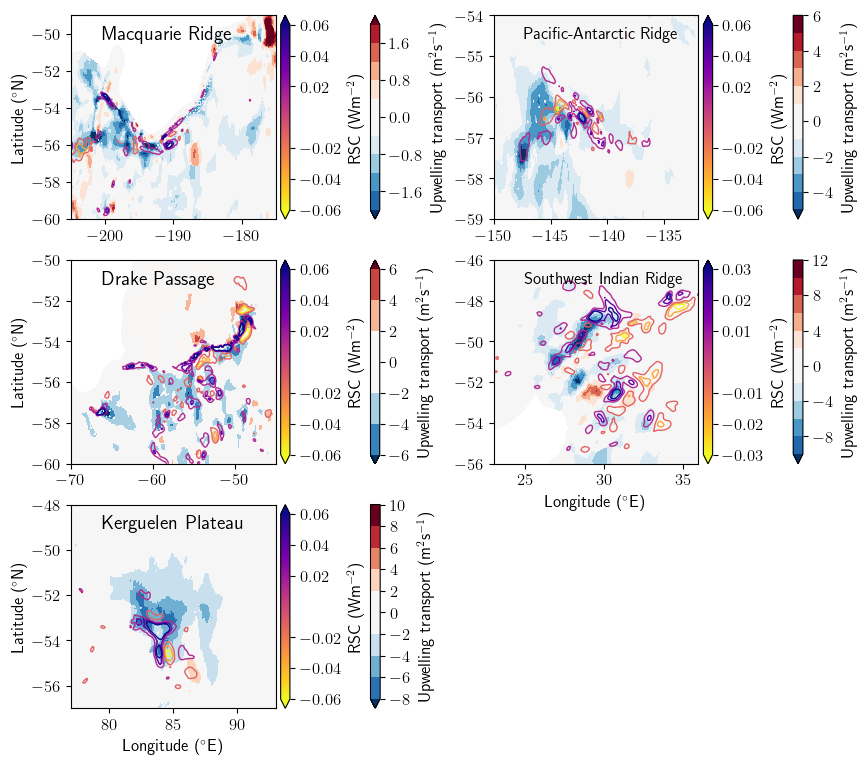

In [27]:
newcmap = cm.tools.crop_by_percent(cm.cm.tempo, 30, which='both', N= None)
fig = plt.figure(num=1,figsize=(10,9))
gs = gridspec.GridSpec(3,2) 
ax0, ax1, ax2, ax3, ax4 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,0]), plt.subplot(gs[1,1]), plt.subplot(gs[2,0])
gs.update(hspace = 0.2, wspace=0.2)

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp
p0 = (transport_new).plot.contourf(ax= ax0,x = 'x_ocean', levels = np.arange(-2.0,2.1,0.4), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax0, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.2962295,1032.51)).sum('isopycnal_bins')
p1 = RS_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-205,-175)).plot.contour(ax = ax0,cmap = 'plasma_r', levels = [-0.06,-0.04,-0.02,0.02,0.04,0.06], add_colorbar = False, linewidths = 1)
#cb = plt.colorbar(p1,ax=ax0, orientation='vertical', pad = 0.02, spacing = 'proportional', extend='both')
#cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.06, vmax=0.06)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax0, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.06,-0.04,-0.02,0.02,0.04,0.06])

ax0.text(0.15,0.88,'Macquarie Ridge', fontsize = 14, transform=ax0.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/PAR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                  
p0 = (transport_new).plot.contourf(ax= ax1,x = 'x_ocean', levels = np.arange(-5,7,1), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax1, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.22305317,1032.5)).sum('isopycnal_bins')
p1 = RS_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contour(ax = ax1,cmap = 'plasma_r', levels = [-0.06,-0.04,-0.02,0.02,0.04,0.06], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax1, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.06, vmax=0.06)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax1, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.06,-0.04,-0.02,0.02,0.04,0.06])

ax1.text(0.15,0.88,'Pacific-Antarctic Ridge', fontsize = 12, transform=ax1.transAxes);
#############################################################################################


transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/DP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax2,x = 'x_ocean', levels = np.arange(-6,7,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax2, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.13010113,1032.48)).sum('isopycnal_bins')
p1 = RS_upwelling.sel( yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2,cmap = 'plasma_r', levels = [-0.06,-0.04,-0.02,0.02,0.04,0.06], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax2, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.06, vmax=0.06)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax2, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.06,-0.04,-0.02,0.02,0.04,0.06])

ax2.text(0.15,0.88,'Drake Passage', fontsize = 14, transform=ax2.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SWIR_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax3,x = 'x_ocean', levels = np.arange(-10,13,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax3, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', pad = 0.15)
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.13490907,1032.48)).sum('isopycnal_bins')
p1 = RS_upwelling.sel( yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3,cmap = 'plasma_r', levels = [-0.03,-0.02,-0.01,0.01,0.02,0.03], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax3, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.03, vmax=0.03)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax3, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.03,-0.02,-0.01,0.01,0.02,0.03])

ax3.text(0.15,0.88,'Southwest Indian Ridge', fontsize = 12, transform=ax3.transAxes);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/KP_vh_eddy_interp_upwellingarm_constant.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax4,x = 'x_ocean', levels = np.arange(-8,11,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax4, label = 'Upwelling transport (m$^{2}$s$^{-1}$)', extend = 'both', pad = 0.15)
RS_upwelling_KP = Reynolds.sel(isopycnal_bins=slice(1032.19249245,1032.48)).sum('isopycnal_bins').roll(xt_ocean = 800)
RS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
p1 = RS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = 'plasma_r', levels = [-0.06,-0.04,-0.02,0.02,0.04,0.06], add_colorbar = False, linewidths = 1)

# cb = plt.colorbar(p1,ax=ax4, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.06, vmax=0.06)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax4, orientation='vertical', label='RSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.02, ticks = [-0.06,-0.04,-0.02,0.02,0.04,0.06])

ax4.text(0.15,0.88,'Kerguelen Plateau', fontsize = 14, transform=ax4.transAxes);
#############################################################################################

ax0.set_ylabel('Latitude ($^\circ$N)')
ax0.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('Latitude ($^\circ$N)')
ax2.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xlabel('Longitude ($^\circ$E)')
ax4.set_ylabel('Latitude ($^\circ$N)')
ax4.set_xlabel('Longitude ($^\circ$E)')

ax0.set_ylim(-60,-49)
ax0.set_xlim(-205,-175)
ax1.set_xlim(-150,-132)
ax1.set_ylim(-59,-54)
ax2.set_xlim(-70,-45)
ax2.set_ylim(-60,-50)
ax3.set_xlim(23,36)
ax3.set_ylim(-56,-46)
ax4.set_xlim(77,93)
ax4.set_ylim(-57,-48)

#fig.savefig('RSinterp.png', dpi = 400)
